## **Mount the Google Drive folder to notebook:**
- Run the below cell
- Click the URL
- Log in with your Google account
- Copy the authorization code 
- Paste into the text box

In [ ]:
# Connect notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## **Navigate to the shared drive folder.**
*NOTE: Before you do that, make sure you have added the folder to your drive. To do this, make sure you are logged into the same Google account which was used to log in in the above cell. Go to the Google Drive folder and click the drop down menu next to 'Cardiac Pathway Collections of Reactome' at the top, then click 'Add Shortcut to Drive'. Make sure you add the short cut to 'My Drive'. Then the rest of the notebook should run just fine. If these instructions aren't clear, please see the below picture.*

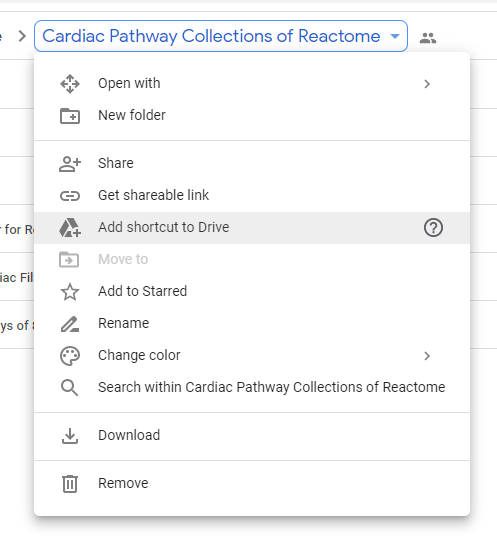

In [ ]:
# Navigate to the shared drive folder
%cd /content/drive/'My Drive'/'Pig Proteomics Summer Project'
!pwd
!ls

/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project
/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project
'2021-06-21 Introduction to Proteomes.ipynb'
'2021-06-28 Reactome and Uniprot.ipynb'
'2021-06-29 Identifying characteristics of an unreliable protein.gslides'
 data
 gene_PE.ipynb
 histogram.ipynb
 output
 pe_scores.ipynb
 scratch
'Summer Project.gdoc'
'Week 1 Introduction slides.gslides'


## Download the data

The first thing you need to do is download the data and process them with python. You can download the proteomes from the uniprot website and unzip yourself, but it can also be done computationally using a few lines of unix. Below is an example for the human proteome.

In [ ]:
! wget https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/reference_proteomes/Eukaryota/UP000005640/UP000005640_9606.fasta.gz

--2021-06-21 22:13:07--  https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/reference_proteomes/Eukaryota/UP000005640/UP000005640_9606.fasta.gz
Resolving ftp.uniprot.org (ftp.uniprot.org)... 128.175.240.195
Connecting to ftp.uniprot.org (ftp.uniprot.org)|128.175.240.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7722965 (7.4M) [application/x-gzip]
Saving to: ‘UP000005640_9606.fasta.gz’

UP000005640_9606.fa 100%[===================>]   7.36M  10.5MB/s    in 0.7s    

2021-06-21 22:13:08 (10.5 MB/s) - ‘UP000005640_9606.fasta.gz’ saved [7722965/7722965]

--2021-06-21 22:13:08--  http://./data
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2021-06-21 22:13:08--
Total wall clock time: 1.1s
Downloaded: 1 files, 7.4M in 0.7s (10.5 MB/s)


**wget** is a tool that downloads a file based on a url. It will download the file into the current directory (which should be the Google Drive folder)

Double check it successfully downloaded. You should see "UP(...).fasta.gz"

**ls** lists the files in your current directory

In [ ]:
!ls 

 data	  scratch		'Untitled presentation.gslides'
 output  'Summer Project.gdoc'	 UP000005640_9606.fasta.gz


Let's unzip it, use **gunzip** followed by the file name to unzip

In [ ]:
!gunzip UP000005640_9606.fasta.gz

In [ ]:
!ls

 data	  scratch		'Untitled presentation.gslides'
 output  'Summer Project.gdoc'	 UP000005640_9606.fasta


If it successfully unzipped, you should see no error message and a *.fasta file.

Let's take a look at the file. **head** outputs the first 10 lines of the file name. You can see it was downloaded in fasta format. Each line that starts with ">" is the header for a protein sequence. Lines that follow are the amino acid sequence of the protein.

In [ ]:
! head UP000005640_9606.fasta

>tr|A0A075B6U7|A0A075B6U7_HUMAN T cell receptor alpha joining 23 (Fragment) OS=Homo sapiens OX=9606 GN=TRAJ23 PE=4 SV=1
XIYNQGGKLIFGQGTELSVKP
>tr|A0A2R8YED5|A0A2R8YED5_HUMAN Olfactory receptor OS=Homo sapiens OX=9606 GN=OR5BS1P PE=3 SV=1
MEVSNMTTVTVFILLGLSNNPQVQALLFVLFLVIYLLTLLGNLLMVLVISTDSHLCTPMY
FFLRQLSFLDAFYSSIIVPKLLENLLSKGETISFLECFTQISLVIFSGATEACLLSVMAY
DRFQAMCHPLLYVVIINRRVCAGLVGASWAIGMGTGLINTLLLAQQHFCGPNVIHSFACE
LPPVLLLTCSDPCASIVSILTTMSVLGLGTLVLLLGSYSCIIMTALRINSATGRSKIFST
CSSHFLVVTIFYTSGVLRYMIPASGSALEQVLSVQYSVITPLLNPLIYSLKSQEVKVALR
RMLARKSRLPL
>sp|A2RRL7|TM213_HUMAN Transmembrane protein 213 OS=Homo sapiens OX=9606 GN=TMEM213 PE=3 SV=2


Let's see how many proteins are in the file. Use **cat** (filename) | **grep** "^>" | **wc** -l

- **cat** outputs the contents of the file to the terminal
- **|** (pipe) takes the output from the previous command and sends it to the next
- **grep** searches for a particular string ("^>" in this case, lines that start with the '>' character) and only outputs those lines
- **wc** stands for word count, -l flag only tells you the number of lines

In total, this command tells you how many lines start with '>' in the file, which will be the number of proteins.

In [ ]:
! cat UP000005640_9606.fasta | grep "^>" | wc -l

20600


How many lines are from SwissProt and how many are from TrEMBL?

In [ ]:
! cat UP000005640_9606.fasta | grep "^>sp" | wc -l

20297


In [ ]:
! cat UP000005640_9606.fasta | grep "^>tr" | wc -l

303


Oh dear. It looks like we're missing a lot of TrEMBL ID's and some Swiss-Prot ID's. The website says UniProtKB (78,120), Reviewed (20,371), Unreviewed (57,749)

 Turns out the url I used was under 'Gene Count: One protein per gene'. Let's keep this though, it might be useful for the future.

In [ ]:
! mv UP000005640_9606.fasta ./data/one_protein_per_gene_proteome/

Let's move that file into a folder called 'one_protein_per_gene_proteome' in the data folder 

In [ ]:
! mv ./data/one_protein_per_gene_proteome/UP000005640_9606.fasta ./data/one_protein_per_gene_proteome/Homo_sapiens_UP000005640_9606.fasta

In [ ]:
! ls ./data/one_protein_per_gene_proteome/

Homo_sapiens_UP000005640_9606.fasta


I renamed it with 'Homo_sapiens_" in front of it just to make it easier to remember which file is which. I recommmend doing that for mouse and pig also.

Okay, with that done, let's download the proper protein database. 


1.   Go to https://www.uniprot.org/proteomes/UP000005640
2.   On the 'Proteins' row, click on the hilighted number (78,120)
3.   Hit 'Download', make sure "Download all" and "compressed" are checked, then hit 'Go'
4.   Upload the file to Google Drive and repeat the steps to extract

I've downloaded the first one into ./data for you



In [ ]:
! ls data

uniprot-proteome_UP000005640.fasta.gz


In [ ]:
! gunzip ./data/uniprot-proteome_UP000005640.fasta.gz

In [ ]:
! head ./data/uniprot-proteome_UP000005640.fasta

>sp|Q00266|METK1_HUMAN S-adenosylmethionine synthase isoform type-1 OS=Homo sapiens OX=9606 GN=MAT1A PE=1 SV=2
MNGPVDGLCDHSLSEGVFMFTSESVGEGHPDKICDQISDAVLDAHLKQDPNAKVACETVC
KTGMVLLCGEITSMAMVDYQRVVRDTIKHIGYDDSAKGFDFKTCNVLVALEQQSPDIAQC
VHLDRNEEDVGAGDQGLMFGYATDETEECMPLTIILAHKLNARMADLRRSGLLPWLRPDS
KTQVTVQYMQDNGAVIPVRIHTIVISVQHNEDITLEEMRRALKEQVIRAVVPAKYLDEDT
VYHLQPSGRFVIGGPQGDAGVTGRKIIVDTYGGWGAHGGGAFSGKDYTKVDRSAAYAARW
VAKSLVKAGLCRRVLVQVSYAIGVAEPLSISIFTYGTSQKTERELLDVVHKNFDLRPGVI
VRDLDLKKPIYQKTACYGHFGRSEFPWEVPRKLVF
>sp|Q8NB16|MLKL_HUMAN Mixed lineage kinase domain-like protein OS=Homo sapiens OX=9606 GN=MLKL PE=1 SV=1
MENLKHIITLGQVIHKRCEEMKYCKKQCRRLGHRVLGLIKPLEMLQDQGKRSVPSEKLTT


In [ ]:
! cat ./data/uniprot-proteome_UP000005640.fasta | grep "^>sp" | wc -l

20371


In [ ]:
! cat ./data/uniprot-proteome_UP000005640.fasta | grep "^>tr" | wc -l

57749


Okay, that's the correct number we are expecting.

In [ ]:
! mv ./data/uniprot-proteome_UP000005640.fasta ./data/Homo_sapiens_uniprot-proteome_UP000005640.fasta 

In [ ]:
!ls ./data

Homo_sapiens_uniprot-proteome_UP000005640.fasta  one_protein_per_gene_proteome


Rename the file to make it easier to remember

### Tasks remaining:
- Download and extract the uniprot database for mouse and pig
- Download and extract the uniprot "one protein per gene" uniprot database for mouse and pig
- Rename them and move them into the data folder

Task 1: Extract "One Protein Per Gene" Uniprot database

The following two cells extract the "one protein per gene" Uniprot databases for sus scrofa and mus muculus (pig and mouse) and moves them to the data folder data/one_protein_per_gene_proteome

In [ ]:
#download the uniprot "one protein per gene" database for sus scrofa and unzips it
!wget https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/reference_proteomes/Eukaryota/UP000008227/UP000008227_9823.fasta.gz
!gunzip UP000008227_9823.fasta.gz

#move one protein per gene database for sus scrofa into data folder and rename for convenience
!mv UP000008227_9823.fasta ./data/one_protein_per_gene_proteome/
! mv ./data/one_protein_per_gene_proteome/UP000008227_9823.fasta ./data/one_protein_per_gene_proteome/sus_scrofa_UP000008227_9823.fasta

--2021-06-22 22:55:22--  https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/reference_proteomes/Eukaryota/UP000008227/UP000008227_9823.fasta.gz
Resolving ftp.uniprot.org (ftp.uniprot.org)... 128.175.240.195
Connecting to ftp.uniprot.org (ftp.uniprot.org)|128.175.240.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7853999 (7.5M) [application/x-gzip]
Saving to: ‘UP000008227_9823.fasta.gz’

UP000008227_9823.fa 100%[===================>]   7.49M  27.9MB/s    in 0.3s    

2021-06-22 22:55:22 (27.9 MB/s) - ‘UP000008227_9823.fasta.gz’ saved [7853999/7853999]

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
sh: 0: getcwd() failed: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file o

In [ ]:
#download the uniprot "one protein per gene" database for mus musculus and unzips it
!wget https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/reference_proteomes/Eukaryota/UP000000589/UP000000589_10090.fasta.gz
!gunzip UP000000589_10090.fasta.gz

#move one protein per gene database for mus muculus into data folder and rename for convenience
!mv UP000000589_10090.fasta ./data/one_protein_per_gene_proteome/
! mv ./data/one_protein_per_gene_proteome/UP000000589_10090.fasta ./data/one_protein_per_gene_proteome/mus_musculus_UP000000589_10090.fasta

--2021-06-22 22:58:51--  https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/reference_proteomes/Eukaryota/UP000000589/UP000000589_10090.fasta.gz
Resolving ftp.uniprot.org (ftp.uniprot.org)... 128.175.240.195
Connecting to ftp.uniprot.org (ftp.uniprot.org)|128.175.240.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8022428 (7.7M) [application/x-gzip]
Saving to: ‘UP000000589_10090.fasta.gz’

UP000000589_10090.f 100%[===================>]   7.65M  26.9MB/s    in 0.3s    

2021-06-22 22:58:51 (26.9 MB/s) - ‘UP000000589_10090.fasta.gz’ saved [8022428/8022428]

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
sh: 0: getcwd() failed: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such fil

Task 2: Extract "proper" Uniprot databases for pig and mouse

The way this is done is through downloading the FASTA.gz files for both sus scrofa and mus muscules, uploading them onto the Drive and then follow the same procedure to extract the database

In [ ]:
#unzip the sus scrofa Uniprot database
! gunzip ./data/uniprot-proteome_UP000008227.fasta.gz
! mv ./data/uniprot-proteome_UP000008227.fasta ./data/sus_scrofa_uniprot-proteome_UP000008227.fasta

gzip: ./data/uniprot-proteome_UP000008227.fasta.gz: No such file or directory


In [ ]:
#unzip the mus musculus Uniprot database
! gunzip ./data/uniprot-proteome_UP000000589.fasta.gz
! mv ./data/uniprot-proteome_UP000000589.fasta ./data/mus_musculus_uniprot-proteome_UP000000589.fasta

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
sh: 0: getcwd() failed: Transport endpoint is not connected
gzip: ./data/uniprot-proteome_UP000000589.fasta.gz: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
mv: failed to access './data/mus_musculus_uniprot-proteome_UP000000589.fasta': Transport endpoint is not connected


Tests run on the sus scrofa and mus musculus databases



In [ ]:
#SUS SCROFA "one protein per gene" DB number of SP entries
! cat ./data/one_protein_per_gene_proteome/sus_scrofa_UP000008227_9823.fasta | grep "^>sp" | wc -l

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
1438


In [ ]:
#SUS SCROFA "one protein per gene" DB number of TR entries
! cat ./data/one_protein_per_gene_proteome/sus_scrofa_UP000008227_9823.fasta | grep "^>tr" | wc -l

20727


In [ ]:
#SUS SCROFA "proper" DB number of SP entries
! cat ./data/sus_scrofa_uniprot-proteome_UP000008227.fasta | grep "^>sp" | wc -l

1438


In [ ]:
#SUS SCROFA "proper" DB number of TR entries
! cat ./data/sus_scrofa_uniprot-proteome_UP000008227.fasta | grep "^>tr" | wc -l

48354


In [ ]:
#MUS MUSCULUS "one protein per gene" DB number of SP entries
! cat ./data/one_protein_per_gene_proteome/mus_musculus_UP000000589_10090.fasta | grep "^>sp" | wc -l

17021


In [ ]:
#MUS MUSCULUS "one protein per gene" DB number of TR entries
! cat ./data/one_protein_per_gene_proteome/mus_musculus_UP000000589_10090.fasta | grep "^>tr" | wc -l

4980


In [ ]:
#MUS MUSCULUS "proper" DB number of SP entries mus_musculus_uniprot-proteome_UP000000589.fasta
! cat ./data/mus_musculus_uniprot-proteome_UP000000589.fasta | grep "^>sp" | wc -l

17077


In [ ]:
#MUS MUSCULUS "proper" DB number of TR entries
! cat ./data/mus_musculus_uniprot-proteome_UP000000589.fasta | grep "^>tr" | wc -l

38289


## Parsing protein databases

The goal of this notebook is to identify characteristics of an unreliable protein based on (but not limited to): 
- Protein length compared to human and/or mouse protein homolog
- Find the gene product with highest sequence similarity using BLAST or similar sequence tool
- Looking at metadata or citations to help guide decision making

Let's look at the uniprot headers

In [ ]:
! cat ./data/Homo_sapiens_uniprot-proteome_UP000005640.fasta | grep "^>" | head

>sp|Q00266|METK1_HUMAN S-adenosylmethionine synthase isoform type-1 OS=Homo sapiens OX=9606 GN=MAT1A PE=1 SV=2
>sp|Q8NB16|MLKL_HUMAN Mixed lineage kinase domain-like protein OS=Homo sapiens OX=9606 GN=MLKL PE=1 SV=1
>sp|O94851|MICA2_HUMAN [F-actin]-monooxygenase MICAL2 OS=Homo sapiens OX=9606 GN=MICAL2 PE=1 SV=1
>sp|Q8TDZ2|MICA1_HUMAN [F-actin]-monooxygenase MICAL1 OS=Homo sapiens OX=9606 GN=MICAL1 PE=1 SV=2
>sp|Q9NPJ6|MED4_HUMAN Mediator of RNA polymerase II transcription subunit 4 OS=Homo sapiens OX=9606 GN=MED4 PE=1 SV=1
>sp|Q8N635|MEIOB_HUMAN Meiosis-specific with OB domain-containing protein OS=Homo sapiens OX=9606 GN=MEIOB PE=2 SV=3
>sp|O15553|MEFV_HUMAN Pyrin OS=Homo sapiens OX=9606 GN=MEFV PE=1 SV=1
>sp|Q8NCK7|MOT11_HUMAN Monocarboxylate transporter 11 OS=Homo sapiens OX=9606 GN=SLC16A11 PE=1 SV=1
>sp|Q9HD23|MRS2_HUMAN Magnesium transporter MRS2 homolog, mitochondrial OS=Homo sapiens OX=9606 GN=MRS2 PE=1 SV=1
>sp|Q9NYP9|MS18A_HUMAN Protein Mis18-alpha OS=Homo sapiens OX=9606 GN

We can see several protein headers. In general, the format of Uniprot protein header is:

\> (sp/tr) | (Uniprot accession) | (Mnemonic identifier)  (protein name) OS=(organism) OX=(taxon identifier) GN=(gene name) PE=??? SV=???

The first task for this week we can do is:
- make a pandas dataframe with headers as (Gene, Human, Mouse, Pig), which list the proteins found for each gene in each organism using the complete Uniprot database 

In [ ]:
! pip install fastaparser

In [ ]:
import fastaparser
import pandas as pd
import re

def parse_fasta_file(file_name):
    """
    this function parses a FASTA database and returns it as a mapping from the
    header of the protein to the amino acid sequence it corresponds to
    mapping: {header: sequence}
    """
    out_dict = {}
    fastaRaw = [] #uses quick parsing method
    with open(file_name) as fasta_file:
        parserQuick = fastaparser.Reader(fasta_file, parse_method = 'quick')
        
        for seq in parserQuick:
            fastaRaw.append(seq)
            
    headerList = []
    seqList = []
    
    for k in fastaRaw:
        headerList.append(k.header)
        seqList.append(k.sequence)
    
    if len(headerList) != len(seqList):
        raise ValueError("Number of headers =/= number of sequences")
    
    for i in range(len(headerList)):
        out_dict[headerList[i]] = seqList[i]
    
    return out_dict


def fasta_to_table(file_name):
    """
    creates function which accepts a FASTA file and returns dataframe in this format:
    SP or TR | Accession | Organism | Gene Name | Length
    --------------------------------------------------------
    if it is swissprot or trembl, accession, organism, its gene name, and length
    """
    header = ['sptr', 'Accession', 'Organism', 'Gene name', 'Length']
    sptr = []
    accession = []
    organism = []
    gene_name = []
    length = []
    fastaRaw = []
    indice1 = 0 #indice for 'OS='
    indice2 = 0 #indice for 'OX='
    indice3 = 0 #indice for 'GN='
    indice4 = 0 #indice for 'PE='
    
    out_dict = parse_fasta_file(file_name)
    
    for key in out_dict.keys():
        indice1 = True #indice for 'OS='
        indice2 = True #indice for 'OX='
        indice3 = True #indice for 'GN='
        indice4 = True #indice for 'PE='
        
        indice = []

        t1 = key[1:3] #sp or tr

        for j in range(len(key)):
            t_find = key[j:j+1]
            if t_find == '|':
                indice.append(j)
            else:
                pass
        
        t2 = key[indice[0]+1:indice[1]] #accession
        
        for k in range(len(key)):
            dummyText = key[k:k+3]
            if dummyText == 'OS=':
                indice1 = k
            elif dummyText == 'OX=':
                indice2 = k
            elif dummyText == 'GN=':
                indice3 = k
            elif dummyText == 'PE=':
                indice4 = k
            else:
                pass
        
        if indice3 == True:
          GNName = ''
        else:
          GNName = key[indice3+3:indice4]
        
        OSName = key[indice1+3:indice2]
        lengthCalc = len(out_dict[key])

        sptr.append(t1)
        accession.append(t2)
        organism.append(OSName)
        gene_name.append(GNName)
        length.append(lengthCalc)
        
    data = {'sptr' : sptr, 'accession' : accession, 'organism' : organism, 'GN' : gene_name,
           'length' : length}
    df = pd.DataFrame(data)
    
    return df


def group_by_gene(fasta_table, n = 100):
    """
    group_by_gene function accepts COMBINED (all databases using appendDict) FASTA table 
    from fasta_to_table function
    lists each organism's accessions for every gene name
    GN | Human | Pig | Mouse
    ---------------------------
    """
    header = ['Gene name', 'Human', 'Mouse', 'Pig']
    humanProtein = []
    mouseProtein = []
    pigProtein = []
    
    #fasta_table = fasta_table.sample(n)
    GN_list = list(fasta_table['GN'])
    GN_set = list(set(GN_list))
    geneDict = {}
    dummyList = []

    #TO ACCOUNT FOR CASE SENSITIVITY:
    GN_list = [x.upper() for x in GN_list]
    GN_set = [x.upper() for x in GN_set]
    
    for i in GN_set:
        c = 0
        humanDummy = []
        mouseDummy = []
        pigDummy = []
        
        for j in GN_list:
            if i == j:
                if fasta_table['organism'].values[c] == 'Sus scrofa ':
                    pigDummy.append(fasta_table['accession'].values[c])
                elif fasta_table['organism'].values[c] == 'Mus musculus ':
                    mouseDummy.append(fasta_table['accession'].values[c])
                elif fasta_table['organism'].values[c] == 'Homo sapiens ':
                    humanDummy.append(fasta_table['accession'].values[c])
            else:
                pass
            
            c = c + 1

        ''' how alex would have done it
        sub_table = fasta_table[fasta_table['GN'] == i]
        pig_list = set(sub_table[sub_table['organism'] == 'Sus scrofa']['accession])
        '''
        
        humanProtein.append(humanDummy)
        pigProtein.append(pigDummy)
        mouseProtein.append(mouseDummy)
            
    
    data = {'GN' : GN_set, 'human' : humanProtein, 'pig' : pigProtein, 'mouse' : mouseProtein}
    df = pd.DataFrame(data)
        
    return df


# TODO 
# make a list of fasta files (uncompressed)
# parse each file using parse_fasta_file(file_name)
# concatenate the dictionaries for each file into one dictionary
# parse fasta files into a table using fasta_to_table(fasta_file)
# group these by gene based on group_by_gene(fasta_table)
# output result file into "./output/" folder

In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project


In [ ]:
%cd data

/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project/data


In [ ]:
!ls

homo_sapien_all.fasta
Homo_sapiens_uniprot-proteome_UP000005640.fasta
mus_musculus_all.fasta
mus_musculus_uniprot-proteome_UP000000589.fasta
one_protein_per_gene_proteome
other_api
reactome_uniprot
sus_scrofa_all_proteomes.fasta
sus_scrofa_uniprot-proteome_UP000008227.fasta


Run the following cell to test the fasta_to_table function. The one done below is for sus scrofa

In [ ]:
file_names = ['sus_scrofa_uniprot-proteome_UP000008227.fasta', 'mus_musculus_uniprot-proteome_UP000000589.fasta',
              'Homo_sapiens_uniprot-proteome_UP000005640.fasta']

#testing fasta_to_table function on sus scrofa data
pigFASTA = fasta_to_table(file_names[0])
mouseFASTA = fasta_to_table(file_names[1])
humanFASTA = fasta_to_table(file_names[2])
pigFASTA

,sptr,accession,organism,GN,length
0,sp,Q52NJ3,Sus scrofa,SAR1A,198
1,sp,Q6PKU1,Sus scrofa,SPI1,270
2,sp,P80928,Sus scrofa,MIF,115
3,sp,D5K8A2,Sus scrofa,SPATA18,560
4,sp,Q2HYU2,Sus scrofa,PFKM,780
...,...,...,...,...,...
49787,tr,A0A287B7R5,Sus scrofa,MEX3B,576
49788,tr,I3LQB3,Sus scrofa,ATP6V1H,465
49789,tr,K7GNX3,Sus scrofa,SLC25A14,344
49790,tr,A0A287AKI0,Sus scrofa,BCLAF1,921


In [ ]:
mouseFASTA

,sptr,accession,organism,GN,length
0,sp,Q9D2V8,Mus musculus,Mfsd10,456
1,sp,Q8VHK5,Mus musculus,Mlc1,382
2,sp,Q5SW45,Mus musculus,Mks1,561
3,sp,Q3UQI9,Mus musculus,Mindy4,744
4,sp,Q9D273,Mus musculus,Mmab,237
...,...,...,...,...,...
55361,tr,D3Z0K8,Mus musculus,Txnrd2,466
55362,tr,A0A1L1STA1,Mus musculus,Csk,139
55363,tr,A0A0G2JF94,Mus musculus,Trav14-1,121
55364,tr,G5E8Y0,Mus musculus,Slc8a1,970


In [ ]:
humanFASTA

,sptr,accession,organism,GN,length
0,sp,Q00266,Homo sapiens,MAT1A,395
1,sp,Q8NB16,Homo sapiens,MLKL,471
2,sp,O94851,Homo sapiens,MICAL2,1124
3,sp,Q8TDZ2,Homo sapiens,MICAL1,1067
4,sp,Q9NPJ6,Homo sapiens,MED4,270
...,...,...,...,...,...
78115,tr,A0A087WVB8,Homo sapiens,CNBD2,181
78116,tr,H0Y876,Homo sapiens,CCDC136,548
78117,tr,A0A3B3IU88,Homo sapiens,,217
78118,tr,A0A1W2PR38,Homo sapiens,CSAG2,78


In [ ]:
test_set = set(list(pigFASTA['GN']))
print("Number of unique Sus scrofa gene names: ", len(test_set))

Number of unique Sus scrofa gene names:  18029


In [ ]:
test_human = set(list(humanFASTA['GN']))
print("Number of unique Homo sapien gene names: ", len(test_human))

Number of unique Homo sapien gene names:  20500


In [ ]:
test_mouse = set(list(mouseFASTA['GN']))
print("Number of unique Mus musculus gene names: ", len(test_mouse))

Number of unique Mus musculus gene names:  22390


This cell is run to concatenate all 3 parsed dataframes (for human, pig and mouse) together.
It should be noted that the index was reset due to the index in the original concatenated dataframe resetting the index after beginning another dataframe it was appended with

In [ ]:
df_pig = fasta_to_table(file_names[0])
df_mouse = fasta_to_table(file_names[1])
df_human = fasta_to_table(file_names[2])

#combine all 3 dataframes together into one
df_all = df_pig.append([df_mouse,df_human]).reset_index(drop = True)
df_all

,sptr,accession,organism,GN,length
0,sp,Q52NJ3,Sus scrofa,SAR1A,198
1,sp,Q6PKU1,Sus scrofa,SPI1,270
2,sp,P80928,Sus scrofa,MIF,115
3,sp,D5K8A2,Sus scrofa,SPATA18,560
4,sp,Q2HYU2,Sus scrofa,PFKM,780
...,...,...,...,...,...
183273,tr,A0A087WVB8,Homo sapiens,CNBD2,181
183274,tr,H0Y876,Homo sapiens,CCDC136,548
183275,tr,A0A3B3IU88,Homo sapiens,,217
183276,tr,A0A1W2PR38,Homo sapiens,CSAG2,78


Run this cell below to group the above concatenated dataframe into groups.

The structure of the dataframe follows this format:

Index | Gene Name (GN) | Human Accessions | Pig Accessions | Mouse Accessions

----------------------

In [ ]:
group_df = group_by_gene(df_all)

Run the cell below to see the dataframe grouped by gene names for all 3 organisms

In [ ]:
group_df

,GN,human,pig,mouse
0,,"[Q4G0T1, A6NN06, Q6Q795, A8MWL6, A6NJR5, Q6ZS5...","[Q95JC9, P00761, P16225, Q29126, P35496, P8124...","[Q8C0X8, P01652, P04944, P06335, P38639, P0185..."
1,GNGT2,"[O14610, D6RDH5]",[],[Q61017]
2,BRAT1,"[Q6PJG6, F8WDN5]","[F1RI80, A0A287B2D3]","[Q8C3R1, D6RE40, E9QLK3]"
3,GM1553,[],[],[Q66VB7]
4,GM45015,[],[],[A0A140LII9]
...,...,...,...,...
44892,LOC110260576,[],[A0A287AF14],[]
44893,SSXB5,[],[],[Q6XAS2]
44894,KRTAP4-5,[Q9BYR2],[],[]
44895,PKNOX2,"[Q96KN3, E9PQS4, H0YLX0, E9PKL2, E9PRB6]","[F1S778, I3LK60]","[Q8BG99, H3BL39, A0A087WPD3, V9GWW7, A0A087WPZ..."


This code will create a dataframe with the same headers as group_df, but it will only contain the gene names that belong to all 3 organisms

In [ ]:
t1 = group_df[~group_df.human.str.len().eq(0)]
t2 = t1[~t1.pig.str.len().eq(0)]
group_final = t2[~t2.mouse.str.len().eq(0)]

In [ ]:
group_final

,GN,human,pig,mouse
0,,"[Q4G0T1, A6NN06, Q6Q795, A8MWL6, A6NJR5, Q6ZS5...","[Q95JC9, P00761, P16225, Q29126, P35496, P8124...","[Q8C0X8, P01652, P04944, P06335, P38639, P0185..."
2,BRAT1,"[Q6PJG6, F8WDN5]","[F1RI80, A0A287B2D3]","[Q8C3R1, D6RE40, E9QLK3]"
5,ADD2,"[P35612, A0A1C7CYY0, C9J299, C9J080, C9JTM0, C...","[I3L5B0, A0A5G2QPS7]","[Q9QYB8, A0A0N4SWF0]"
6,ATXN7,"[O15265, A0A2R8YDD6, A0A1B0GX67]","[A0A287BD74, A0A287BLU6]","[Q8R4I1, A0A286YCL5, A0A286YDW9]"
7,GSR,"[P00390, H0YC68, A0A2R8YF59]","[A0A5G2QDR8, A0A5G2RBI7, A0A5G2QCB4, A0A5G2QCU...",[P47791]
...,...,...,...,...
44889,NDUFB3,"[O43676, C9JKQ2]","[F1SI50, A0A287AS93]",[Q9CQZ6]
44890,ARMCX6,[Q7L4S7],[F1RYH0],[Q8K3A6]
44891,MEX3C,"[Q5U5Q3, K7ER23, A0A6Q8PG18]",[A0A286ZNU9],[Q05A36]
44895,PKNOX2,"[Q96KN3, E9PQS4, H0YLX0, E9PKL2, E9PRB6]","[F1S778, I3LK60]","[Q8BG99, H3BL39, A0A087WPD3, V9GWW7, A0A087WPZ..."


Run this cell below to get a random sample of n entries of group_final (the dataframe above)

In [ ]:
def random_sample(df, n = 100):
  """
  Gets random sample of n entries from any dataframe (df)
  Default value of n = 100
  """
  return df.sample(n)


In [ ]:
random_sample(group_final)

,GN,human,pig,mouse
33029,CNR1,"[P21554, F8W908, F8W187]",[F1S0E6],[P47746]
8809,MIDN,"[Q504T8, K7EN89, K7END3]","[F1S6Q6, A0A287ABE3]","[Q3TPJ7, D3Z7H2, D3YYX7, D3Z1J8, D3YZI7]"
21608,XYLB,"[O75191, A0A3B3IRM4, A0A3B3IS07, C9J0N9, F8WBF6]","[A0A286ZNC6, A0A5G2RN08, A0A287A3Y3, A0A5G2QZP...","[Q3TNA1, A0A1L1SUA8]"
18768,SLC4A10,"[Q6U841, E7EW28, C9J240, F8WDX9]","[F1RPQ2, A0A5K1UQT4, A0A287AGF6, A0A5K1UQT2]",[Q5DTL9]
16658,ZMYM4,"[Q5VZL5, A0A0A0MSN3, H7C1I7]","[A0A287AUN0, A0A286ZTL1, A0A286ZKB5]","[A2A791, F6VYE2]"
...,...,...,...,...
17551,CAP1,"[Q01518, Q5T0S3, Q5T0R2, Q5T0R6, Q5T0R9, Q5T0R...","[P40125, F1SMC0]","[P40124, B1ARS0]"
10116,RIPK4,[P57078],[F1SG49],[Q9ERK0]
10031,CASP6,"[P55212, D6RBM3, D6RHU3]","[A0A287B811, F1S132, A0A5G2QXI3, F1S131]",[O08738]
25083,USP18,[Q9UMW8],"[A0A287B3S1, A0A287A953]","[Q9WTV6, A0A0N4SVX5]"


In [ ]:
common_gene_names = set(list(group_final['GN']))
print("Number of common genes between humans, pigs and mice: ", len(common_gene_names))

Number of common genes between humans, pigs and mice:  15220


Next, we will be finding the gene names that are in common between each organism. In other words, there are 3 scenarios:

1. Human and pig
2. Human and mouse
3. Mouse and pig

In [ ]:
#Scenario 1: Human and pig
humanPigRaw = group_df[['GN','human','pig']].copy()
humanPig2 = humanPigRaw[~humanPigRaw.human.str.len().eq(0)]
humanPig_final = humanPig2[~humanPig2.pig.str.len().eq(0)]

humanPig_final

,GN,human,pig
0,,"[Q4G0T1, A6NN06, Q6Q795, A8MWL6, A6NJR5, Q6ZS5...","[Q95JC9, P00761, P16225, Q29126, P35496, P8124..."
2,BRAT1,"[Q6PJG6, F8WDN5]","[F1RI80, A0A287B2D3]"
5,ADD2,"[P35612, A0A1C7CYY0, C9J299, C9J080, C9JTM0, C...","[I3L5B0, A0A5G2QPS7]"
6,ATXN7,"[O15265, A0A2R8YDD6, A0A1B0GX67]","[A0A287BD74, A0A287BLU6]"
7,GSR,"[P00390, H0YC68, A0A2R8YF59]","[A0A5G2QDR8, A0A5G2RBI7, A0A5G2QCB4, A0A5G2QCU..."
...,...,...,...
44889,NDUFB3,"[O43676, C9JKQ2]","[F1SI50, A0A287AS93]"
44890,ARMCX6,[Q7L4S7],[F1RYH0]
44891,MEX3C,"[Q5U5Q3, K7ER23, A0A6Q8PG18]",[A0A286ZNU9]
44895,PKNOX2,"[Q96KN3, E9PQS4, H0YLX0, E9PKL2, E9PRB6]","[F1S778, I3LK60]"


In [ ]:
#Scenario 2: Human and mouse
humanMouseRaw = group_df[['GN','human','mouse']].copy()
humanMouse2 = humanMouseRaw[~humanMouseRaw.human.str.len().eq(0)]
humanMouse_final = humanMouse2[~humanMouse2.mouse.str.len().eq(0)]

humanMouse_final

,GN,human,mouse
0,,"[Q4G0T1, A6NN06, Q6Q795, A8MWL6, A6NJR5, Q6ZS5...","[Q8C0X8, P01652, P04944, P06335, P38639, P0185..."
1,GNGT2,"[O14610, D6RDH5]",[Q61017]
2,BRAT1,"[Q6PJG6, F8WDN5]","[Q8C3R1, D6RE40, E9QLK3]"
5,ADD2,"[P35612, A0A1C7CYY0, C9J299, C9J080, C9JTM0, C...","[Q9QYB8, A0A0N4SWF0]"
6,ATXN7,"[O15265, A0A2R8YDD6, A0A1B0GX67]","[Q8R4I1, A0A286YCL5, A0A286YDW9]"
...,...,...,...
44889,NDUFB3,"[O43676, C9JKQ2]",[Q9CQZ6]
44890,ARMCX6,[Q7L4S7],[Q8K3A6]
44891,MEX3C,"[Q5U5Q3, K7ER23, A0A6Q8PG18]",[Q05A36]
44895,PKNOX2,"[Q96KN3, E9PQS4, H0YLX0, E9PKL2, E9PRB6]","[Q8BG99, H3BL39, A0A087WPD3, V9GWW7, A0A087WPZ..."


In [ ]:
#Scenario 3: Mouse and pig

mousePigRaw = group_df[['GN','pig','mouse']].copy()
mousePig2 = mousePigRaw[~mousePigRaw.pig.str.len().eq(0)]
mousePig_final = mousePig2[~mousePig2.mouse.str.len().eq(0)]

mousePig_final

,GN,pig,mouse
0,,"[Q95JC9, P00761, P16225, Q29126, P35496, P8124...","[Q8C0X8, P01652, P04944, P06335, P38639, P0185..."
2,BRAT1,"[F1RI80, A0A287B2D3]","[Q8C3R1, D6RE40, E9QLK3]"
5,ADD2,"[I3L5B0, A0A5G2QPS7]","[Q9QYB8, A0A0N4SWF0]"
6,ATXN7,"[A0A287BD74, A0A287BLU6]","[Q8R4I1, A0A286YCL5, A0A286YDW9]"
7,GSR,"[A0A5G2QDR8, A0A5G2RBI7, A0A5G2QCB4, A0A5G2QCU...",[P47791]
...,...,...,...
44889,NDUFB3,"[F1SI50, A0A287AS93]",[Q9CQZ6]
44890,ARMCX6,[F1RYH0],[Q8K3A6]
44891,MEX3C,[A0A286ZNU9],[Q05A36]
44895,PKNOX2,"[F1S778, I3LK60]","[Q8BG99, H3BL39, A0A087WPD3, V9GWW7, A0A087WPZ..."


Run this cell below to extract the gene names belonging to the 3 scenarios

In [ ]:
HP_GN = set(list(humanPig_final['GN'])) #human and pig
HM_GN = set(list(humanMouse_final['GN'])) #human and mouse
MP_GN = set(list(mousePig_final['GN'])) #mouse and pig

print("Number of gene names in common between human and pig: ", len(HP_GN))
print("Number of gene names in common between human and mouse: ", len(HM_GN))
print("Number of gene names in common between mouse and pig: ", len(MP_GN))

Number of gene names in common between human and pig:  15961
Number of gene names in common between human and mouse:  16681
Number of gene names in common between mouse and pig:  15253


Next objective: Find the number of proteins from each organism which are NOT associated with any GN

In [ ]:
humanNoGN = list(group_final.loc[group_final['GN']=='']['human']) #human proteins with no GN
pigNoGN = list(group_final.loc[group_final['GN'] == '']['pig']) #pig proteins with no GN
mouseNoGN = list(group_final.loc[group_final['GN'] == '']['mouse']) #mouse proteins with no GN

print("Number of human proteins without a GN: ", len(humanNoGN[0]))
print("Number of pig proteins without a GN: ", len(pigNoGN[0]))
print("Number of mouse proteins without a GN: ", len(mouseNoGN[0]))

Number of human proteins without a GN:  840
Number of pig proteins without a GN:  3585
Number of mouse proteins without a GN:  334


Running this cell to create a CSV file that retrieves all gene names that are in common between each pair and all gene names that are NOT in common between each pair

In [ ]:
%cd -

/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project


In [ ]:
%cd output/uniprot

/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project/output/uniprot


In [ ]:
!ls

all_fasta.csv  group_final.csv	human_mouse.csv  human_pig.xlsx  mouse_pig.csv
group_df.csv   humanFASTA.csv	human_pig.csv	 mouseFASTA.csv  pigFASTA.csv


Run the following cells to convert all of the dataframes created above into CSV files

In [ ]:
pigFASTA.to_csv('pigFASTA.csv')
humanFASTA.to_csv("humanFASTA.csv")
mouseFASTA.to_csv("mouseFASTA.csv")

In [ ]:
df_all.to_csv("all_fasta.csv")
group_df.to_csv("group_df.csv")
group_final.to_csv("group_final.csv")

In [ ]:
humanPig_final.to_csv("human_pig.csv")
humanMouse_final.to_csv("human_mouse.csv")
mousePig_final.to_csv("mouse_pig.csv")

In [ ]:
!ls

In [ ]:
%cd output/uniprot

/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project/output/uniprot


In [ ]:
humanFASTA = pd.read_csv("humanFASTA.csv")

In [ ]:
humanFASTA.loc[humanFASTA['accession'] == 'P17947']

,Unnamed: 0,sptr,accession,organism,GN,length
2682,2682,sp,P17947,Homo sapiens,SPI1,270


In [ ]:
mouseFASTA = pd.read_csv("mouseFASTA.csv")

In [ ]:
mouseFASTA.loc[mouseFASTA['accession'] == 'P17433']

,Unnamed: 0,sptr,accession,organism,GN,length
444,444,sp,P17433,Mus musculus,Spi1,272
